In [1]:
from model import *

(35000, 1, 224)
(35000, 576)


In [2]:
"""
#Initialize ResNet
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
print(num_ftrs)
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)
"""
model_ft = Net()
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=.1, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=100, gamma=0.1)

In [3]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=1)

Epoch 0/0
----------
train Loss: 6.3488 Acc: 0.0104
val Loss: 6.3487 Acc: 0.0104

tensor([1.0111e-10, 4.1878e-10, 1.5552e-10, 3.4316e-10, 1.5197e-10, 2.8088e-10,
        1.6199e-10, 2.3281e-10, 1.2100e-10, 1.0268e-10, 4.0497e-10, 3.1545e-10,
        1.8710e-10, 1.2854e-10, 2.8586e-10, 9.2529e-11, 2.8495e-10, 1.0209e-10,
        8.1209e-10, 2.8135e-10, 1.3114e-10, 1.6582e-10, 1.4138e-10, 8.3751e-11,
        9.7402e-11, 2.8567e-10, 5.3575e-10, 1.1752e-09, 2.4194e-10, 2.7951e-10,
        6.5700e-10, 1.0863e-10, 1.7520e-10, 1.1219e-10, 9.1076e-10, 3.8050e-10,
        2.0791e-10, 2.8292e-10, 2.8143e-10, 8.3220e-11, 2.3306e-10, 1.3131e-10,
        1.1599e-10, 1.1838e-10, 1.4009e-10, 4.8689e-10, 1.2196e-10, 6.5697e-11,
        1.3820e-10, 9.5461e-11, 1.9861e-10, 3.5899e-08, 4.1849e-10, 1.0074e-09,
        2.1813e-10, 1.3720e-10, 1.2278e-10, 1.1856e-10, 1.9163e-10, 2.3836e-10,
        1.4485e-10, 1.8167e-10, 3.2833e-10, 1.1883e-10, 1.7730e-10, 3.2737e-10,
        1.4316e-10, 1.7137e-10, 1.3820

In [5]:
df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
df = df.loc[df['primary_type'] <= df['secondary_type']]
pca = PCA(n_components=224)
df = df.sample(10000)
X=df.iloc[:,:440].values    #grab flux values
pca.fit(X)
x=np.expand_dims(pca.transform(X), axis = 1)
print(np.shape(x))
labels_df =df.iloc[:,441:443].values #grab labels
print(np.shape(labels_df))

images= torch.tensor(x,dtype=torch.float32)
labels= torch.tensor(labels_df,dtype=torch.float32)
#labels = (labels - 28) / 11
images = nn.functional.normalize(images)

train_images = images[:int(len(images)*0.8)]
train_labels = labels[:int(len(labels)*0.8)]
test_images = images[int(len(images)*0.8):]
test_labels = labels[int(len(labels)*0.8):]

(10000, 1, 224)
(10000, 2)


TEST THE MODEL:
- this should use the test_images from model import *

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

def acc_map(results, title = 'Prediction'):
    plt.figure(figsize = (8,7), facecolor='white')
    ax = sns.heatmap(results, cmap = "mako")
    labels = ['M6','M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('10') 
    ax.set_ylabel('Primary')
    ax.set_xlabel('Seconday')
    ax.set_title(title)

[ 66 113  39 ...  34 137 227]
Label:  18 34
Label:  20 33
Label:  17 31
Label:  19 35


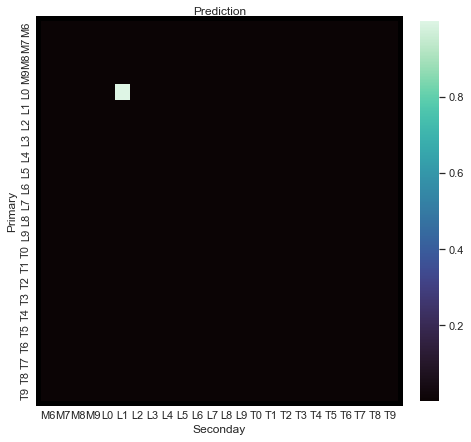

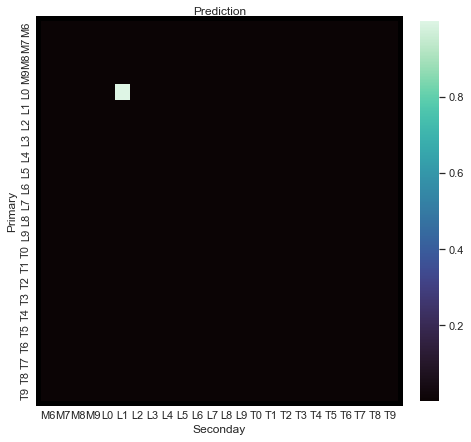

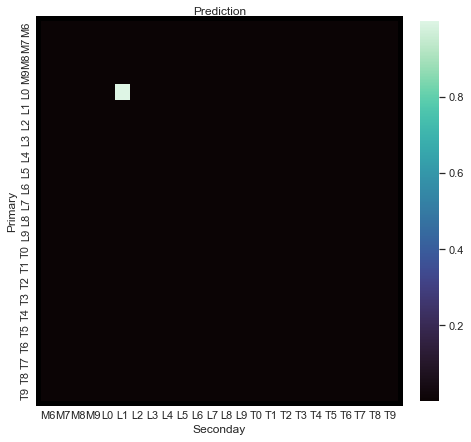

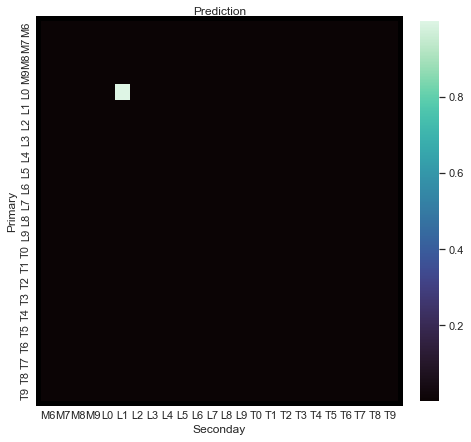

In [6]:
test_labels = test_labels[torch.randperm(test_labels.shape[0])].view(test_labels.size())
target = torch.argmax(test_labels[:], dim=1).numpy()
output = np.reshape(model_ft(test_images[:4]).detach().numpy(), (4,24,24))
print(target)
for i in range(4):
    print('Label: ', target[i] // 24 + 16, target[i] - (target[i] // 24) * 24 + 16)
    acc_map(output[i])